# Eigenface

Find the eigenvectors and eigenvalues of 400 facial images
Perform PCA projection to project the high-dim facial images to low-dim 
vectors

<font color='blue'>Steps 12--13</font>

In [1]:
# Mount Google drive and cd to working folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/Learning/EIE4105/lab2/python/

Mounted at /content/drive
/content/drive/My Drive/Learning/EIE4105/lab2/python


In [1]:
import numpy as np
from sklearn import preprocessing

Solve the eigen problem that involve a big covariance matrix
See http://en.wikipedia.org/wiki/Eigenface. This technique allows us
to compute the covariane of NxN matrix rather than a DxD matrix where
N is the number of training samples and D is the feature dimension.

In [2]:
def featureNormalize(X):
    mu = np.mean(X,axis=0).reshape(1,-1)
    X = X - np.tile(mu, (X.shape[0], 1))
    return X, mu

def pca(X, K=10):
    # Compute the NxN covariance matrix, where N is the no. of samples
    sigma = np.cov(X)
    
    # The column vector eigenvectors[:,i] is the eigenvector with eigenvalues[i]
    # eigenvectors.shape: (N, N)
    eigenvalues, eigenvectors = np.linalg.eig(sigma)    

    # Sort from largest to smallest according to eigenvalues
    index = np.argsort(-eigenvalues)  
    eigenvectors = eigenvectors[:, index]
 
    # Obtain the PCA projection matrix
    V = np.transpose(X) @ eigenvectors
    
    # Normalize V to make unit norm
    V = preprocessing.normalize(V, norm='l2', axis=0)
    
    # Select the K PC
    V = V[:, 0:K]
    
    # Project the face images to eigenspace
    #Z = np.transpose(V) @ np.transpose(X)
    Z = X @ V
    
    return Z, np.transpose(V)

In [3]:
import scipy.io
data = scipy.io.loadmat('../data/faces.mat')

In [4]:
nPC = 400
X, mu = featureNormalize(data['faces'])    # X: (400,93600); mu: (1,93600)
Z, eigenvectors = pca(X, K=nPC)            # Z: (400, nPC); eigenvectors: (nPC,93600)
Xhat = Z @ eigenvectors                    # Xhat: (400,93600)
Xhat = Xhat + np.tile(mu, (Xhat.shape[0], 1))
print(Xhat.shape)

(400, 93600)


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

def show(data):
    fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, )
    ax = ax.flatten()
    for i in range(10):        
        img = data[i].reshape(360, 260)
        img = ax[i].imshow(img, interpolation='nearest', cmap='gray')
 
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    plt.show()

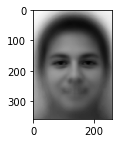

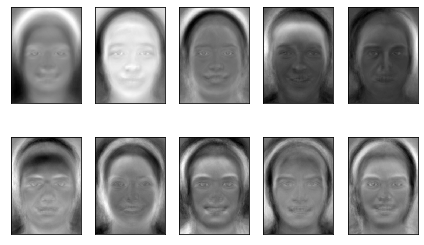

In [6]:
plt.figure(figsize = (2,2))
plt.imshow(mu[0].reshape(360, 260), cmap='gray')
show(eigenvectors)

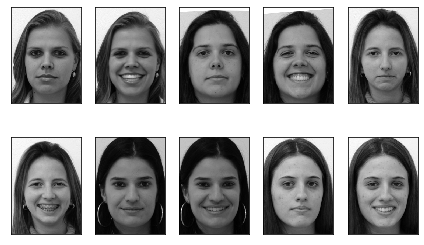

In [8]:
# 10 original faces
show(data['faces'])

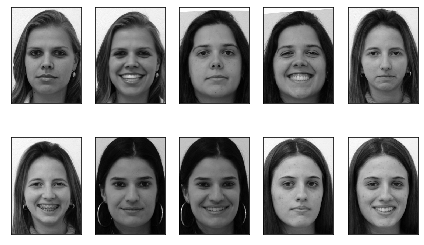

In [9]:
# 10 reconstructed faces
show(Xhat)

Project the faces without mean subtraction

In [10]:
X = data['faces']       # Data matrix without mean subtraction (400,93600)
Z = X @ np.transpose(eigenvectors)
Xhat = Z @ eigenvectors

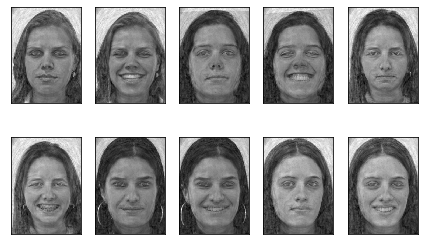

In [11]:
# 10 reconstructed faces without mean subtraction and mean addition
show(Xhat)